**Step 1: Load and Explore the Dataset**

In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/internet_users.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Summary statistics of the numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     238 non-null    object 
 1   Rate (WB)    209 non-null    float64
 2   Year         209 non-null    float64
 3   Rate (ITU)   227 non-null    float64
 4   Year.1       227 non-null    float64
 5   Users (CIA)  232 non-null    float64
 6   Year.2       231 non-null    float64
 7   Notes        2 non-null      object 
dtypes: float64(6), object(2)
memory usage: 15.0+ KB
None

First few rows of the dataset:
         Location  Rate (WB)    Year  Rate (ITU)  Year.1  Users (CIA)  Year.2  \
0           World       67.4  2023.0        67.4  2023.0          NaN     NaN   
1     Afghanistan       18.4  2020.0        17.6  2019.0    7020000.0  2020.0   
2         Albania       83.1  2023.0        83.1  2023.0    2291000.0  2021.0   
3         Algeria       71.2  2022.0     

**Step 2: Data Cleaning and Preprocessing**

In [6]:
# Step 2: Data Cleaning and Preprocessing

# Fill missing numeric values with the column mean
numeric_columns = ['Rate (WB)', 'Year', 'Rate (ITU)', 'Year.1', 'Users (CIA)', 'Year.2']
for col in numeric_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Drop columns with excessive missing values (e.g., 'Notes' with 236 missing values)
data.drop(columns=['Notes'], inplace=True)

# Ensure there are no missing values left
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())

# Save the cleaned dataset to a new file for further use
cleaned_file_path = 'cleaned_dataset.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved as '{cleaned_file_path}'")


Missing Values After Cleaning:
Location       0
Rate (WB)      0
Year           0
Rate (ITU)     0
Year.1         0
Users (CIA)    0
Year.2         0
dtype: int64

Cleaned dataset saved as 'cleaned_dataset.csv'


<ipython-input-6-8a168e12d074>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


**Step 3: Exploratory Data Analysis and Visualization**

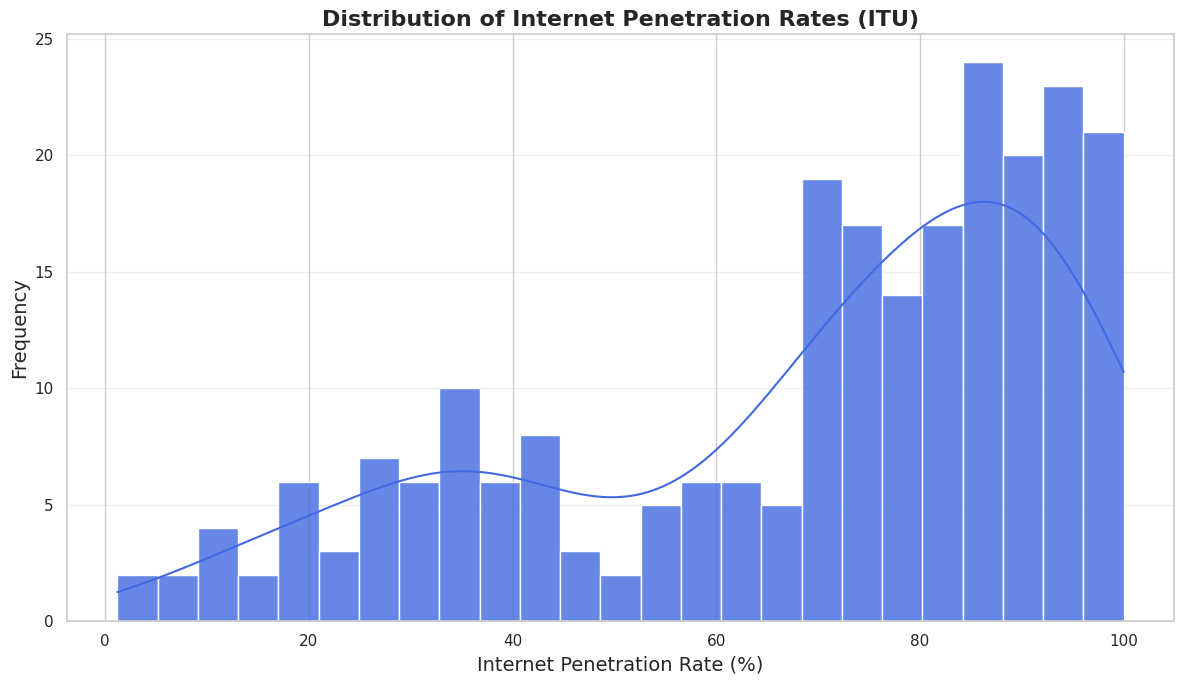

<ipython-input-8-6857ca3d8b75>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_users, x='Users (CIA)', y='Location', palette='coolwarm', orient='h')


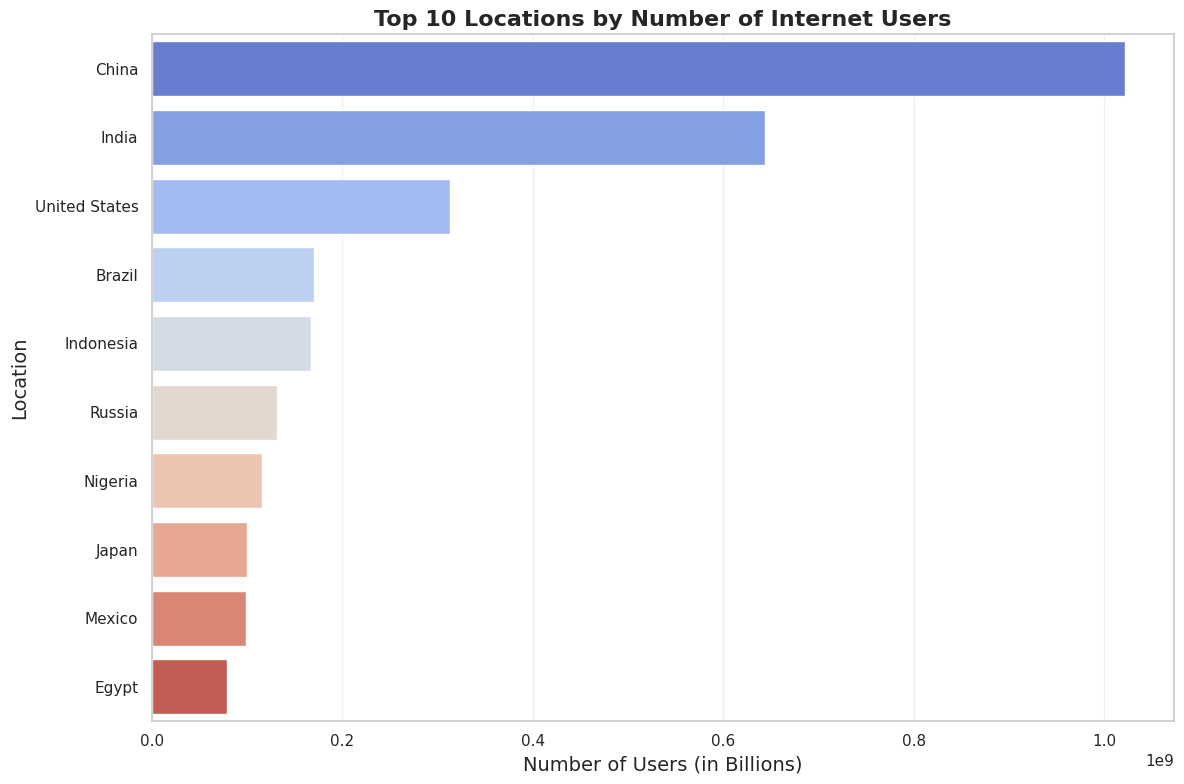

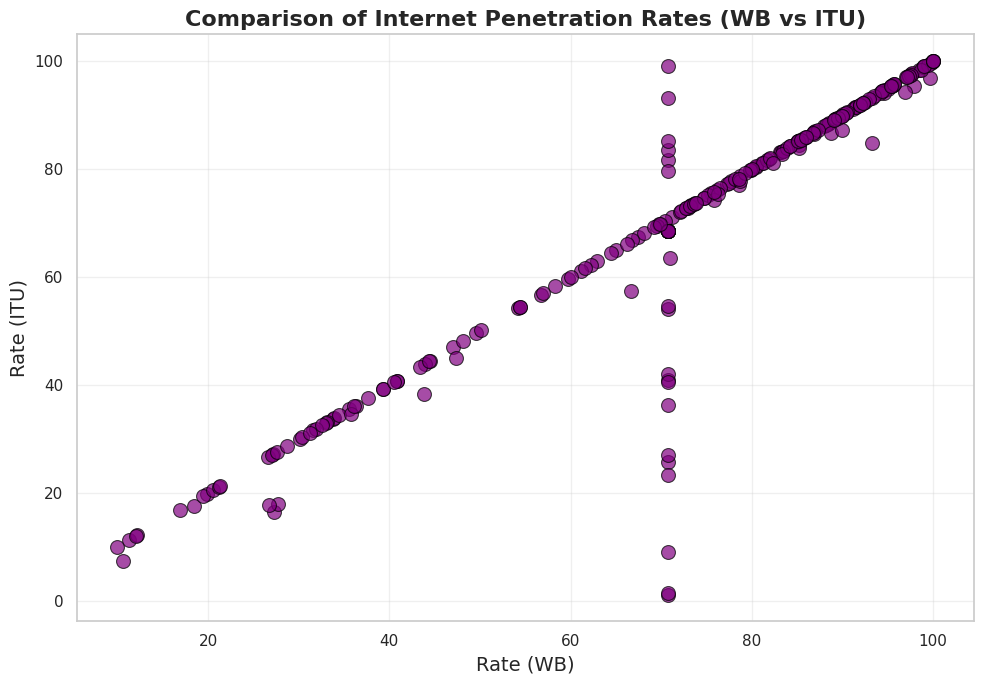

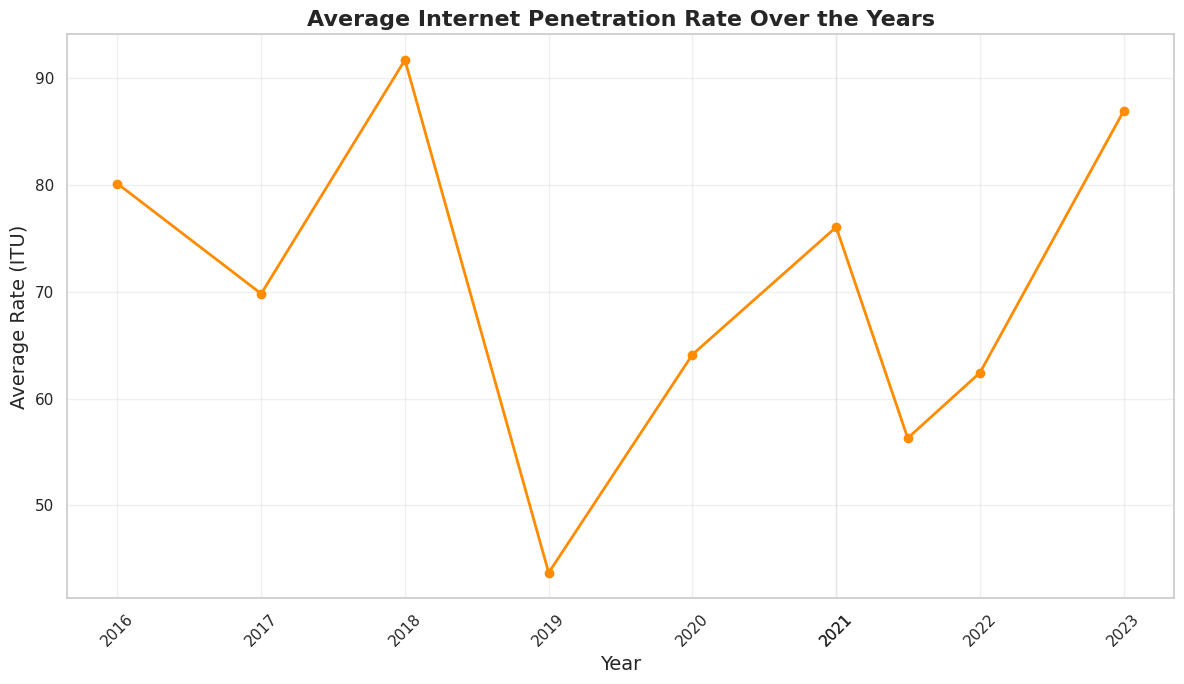

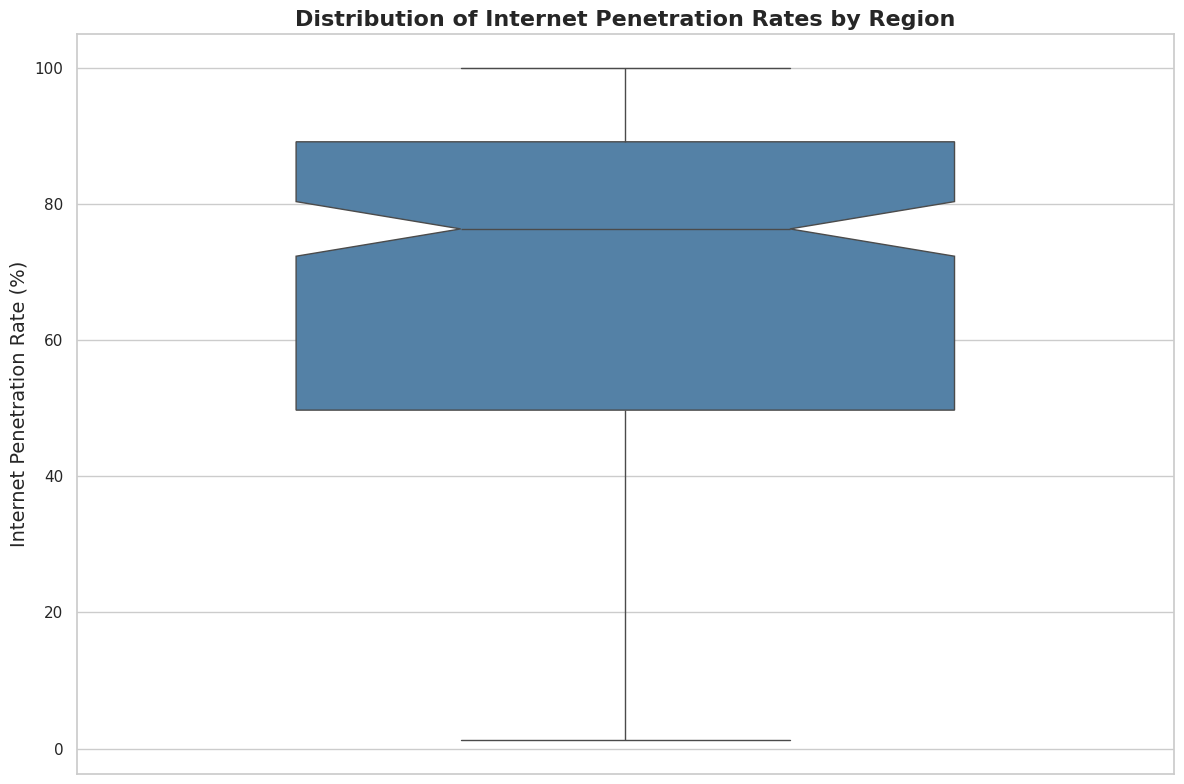

In [8]:
# Step 3: Enhanced Exploratory Data Analysis and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent theme for all plots
sns.set_theme(style="whitegrid")

# Visualization 1: Distribution of Internet Penetration Rates (ITU)
plt.figure(figsize=(12, 7))
sns.histplot(data=data, x='Rate (ITU)', bins=25, kde=True, color='royalblue', alpha=0.8)
plt.title('Distribution of Internet Penetration Rates (ITU)', fontsize=16, fontweight='bold')
plt.xlabel('Internet Penetration Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('distribution_internet_penetration_ITU.png')
plt.show()

# Visualization 2: Top 10 Locations by Number of Internet Users (CIA)
top_10_users = data.nlargest(10, 'Users (CIA)')
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_users, x='Users (CIA)', y='Location', palette='coolwarm', orient='h')
plt.title('Top 10 Locations by Number of Internet Users', fontsize=16, fontweight='bold')
plt.xlabel('Number of Users (in Billions)', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('top_10_locations_internet_users.png')
plt.show()

# Visualization 3: Comparison of Internet Penetration Rates (WB vs ITU)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Rate (WB)', y='Rate (ITU)', color='purple', alpha=0.7, s=100, edgecolor='black')
plt.title('Comparison of Internet Penetration Rates (WB vs ITU)', fontsize=16, fontweight='bold')
plt.xlabel('Rate (WB)', fontsize=14)
plt.ylabel('Rate (ITU)', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('comparison_penetration_rates_WB_vs_ITU.png')
plt.show()

# Visualization 4: Average Internet Penetration Rate Over the Years
avg_rate_by_year = data.groupby('Year')['Rate (ITU)'].mean()
plt.figure(figsize=(12, 7))
plt.plot(avg_rate_by_year.index, avg_rate_by_year.values, marker='o', linestyle='-', color='darkorange', linewidth=2)
plt.title('Average Internet Penetration Rate Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rate (ITU)', fontsize=14)
plt.xticks(avg_rate_by_year.index.astype(int), rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('average_penetration_rate_over_years.png')
plt.show()

# Visualization 5: Internet Penetration Rate by Region (Box Plot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, y='Rate (ITU)', color='steelblue', width=0.6, notch=True)
plt.title('Distribution of Internet Penetration Rates by Region', fontsize=16, fontweight='bold')
plt.ylabel('Internet Penetration Rate (%)', fontsize=14)
plt.tight_layout()
plt.savefig('penetration_rate_boxplot.png')
plt.show()
